# 实验报告（上市公司基础数据，最近三年每股收益，作图）

## 1.上市公司基础数据与最近三年每股收益（以十家公司为例）

环境准备

In [1]:
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

定义pdf转txt函数

In [2]:
def pdf2txt(pdf_file):
    text = ''
    with pdfplumber.open(pdf_file) as pdf:
        for page in pdf.pages:
            text_in_page = page.extract_text()
            if text_in_page != None:
                text += text_in_page
            else:
                pass
    txt_file = pdf_file[0:-4]+'.txt'
    f_txt = open(txt_file, 'w', encoding='utf-8')
    f_txt.write(text)
    f_txt.close()
    return()


定义读取txt内容函数

In [3]:
def txt2(txt_file):
    f = open(txt_file, 'r', encoding='utf-8')
    text = f.read()
    f.close()
    return(text)

遍历文件中每一个子文件

In [4]:
file_dir = r'C:\Users\yi\2019'
file_list =[]
for files in os.walk(file_dir):
    for file in files[2]:
        if os.path.splitext(file)[1]  == '.pdf' or os.path.splitext(file)[1] == '.pdf':
            file_list.append(file_dir + '\\' + file)
print(file_list)

['C:\\Users\\yi\\2019\\300081：2019年年度报告.pdf', 'C:\\Users\\yi\\2019\\300161：2019年年度报告.pdf', 'C:\\Users\\yi\\2019\\300174：2019年年度报告.pdf', 'C:\\Users\\yi\\2019\\300214：2019年年度报告.pdf', 'C:\\Users\\yi\\2019\\300235：2019年年度报告.pdf', 'C:\\Users\\yi\\2019\\300291：2019年年度报告.pdf', 'C:\\Users\\yi\\2019\\300316：2019年年度报告.pdf', 'C:\\Users\\yi\\2019\\300363：2019年年度报告.pdf', 'C:\\Users\\yi\\2019\\300370：2019年年度报告.pdf', 'C:\\Users\\yi\\2019\\300808：2019年年度报告.pdf']


将每个pdf名称以列表显示，并得到相应txt文档

In [5]:
path ="C:\\Users\\yi\\2019"
ljpdf = os.listdir( path )
for item in ljpdf:
    path ="C:\\Users\\yi\\2019\\"+item
    print(item)
    pdf2txt(path)
path ="C:\\Users\\yi\\2019"
ljpdf = os.listdir( path )    


300081：2019年年度报告.pdf
300161：2019年年度报告.pdf
300174：2019年年度报告.pdf
300214：2019年年度报告.pdf
300235：2019年年度报告.pdf
300291：2019年年度报告.pdf
300316：2019年年度报告.pdf
300363：2019年年度报告.pdf
300370：2019年年度报告.pdf
300808：2019年年度报告.pdf


将pdf文件放入pdf_files,txt文件放入txt_files

In [6]:
pdf_files = []
for f in ljpdf:
    if f[-4:] == '.pdf':
        pdf_files.append(f)
txt_files = []
for f in ljpdf:
    if f[-4:] == '.txt':        
        txt_files.append(f)


各项基本信息首字母简称

In [17]:
gpjc=[]
gpdm=[]
fddbr=[]
bgdz=[]
gswz=[]
dzxx=[]
mgsy2019=[]
mgsy2018=[]
mgsy2017=[]


筛选信息

In [18]:
for item in txt_files:
    path = 'C:\\Users\\yi\\2019\\'+item
    f = open(path, 'r', encoding='utf-8')
    text = f.read()
    start1 = text.find('一、公司信息')
    end1 = text.find('二、联系人和联系方式')     
    toal1 = text[start1:end1]
    start2 = text.find('五、主要会计数据和财务指标')
    end2 = text.find('六、分季度主要财务指标')
    total2 = text[start2:end2]
    #print(total1)
    #print(total2)
    
    jc = total1.find('股票简称')
    mc = total1.find('公司的外文名称')
    fd = total1.find('公司的法定代表人')
    zc = total1.find('注册地址')
    dz = total1.find('办公地址')
    yb = total1.find('办公地址的邮政编码')
    wz = total1.find('公司国际互联网网址')
    lx = total1.find('二、联系人和联系方式')
    jbsy = total2.find('基本每股收益（元/股）') 
    xssy = total2.find('稀释每股收益（元/股）') 
    jbxx1 = total1[jc:mc]+total1[fd:zc]+total1[dz:yb]+total1[wz:lx]
    jbxx2 = total2[jbsy:xssy]
    jbxx = jbxx1+' '+jbxx2
    #print(jbxx)
    
    jbxx = jbxx.replace('\n',' ')
    words = jbxx.split(' ')
    result = [i for i in words if i != '']
    #print(result)

    gpjc.append(result[1])
    gpdm.append(result[3])
    fddbr.append(result[9])
    bgdz.append(result[11])
    gswz.append(result[13])
    dzxx.append(result[15])
    mgsy2019.append(result[17])
    mgsy2018.append(result[18])
    mgsy2017.append(result[20])  

显示结果

In [19]:
gsxx = pd.DataFrame({'股票简称':gpjc,
                 '股票代码':gpdm,
                 '法定代表人':fddbr,
                 '办公地址':bgdz,
                 '公司网址':gswz,
                 '公司邮箱':dzxx,
                 '2019年基本每股收益（元/股）':mgsy2019,
                 '2018年基本每股收益（元/股）':mgsy2018,
                 '2017年基本每股收益（元/股）':mgsy2017})  
print('gsxx：')
display(gsxx)

gsxx：


股票简称    股票代码 法定代表人                   办公地址                   公司网址  \
0  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层  http://www.hxgro.com/   
1  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层  http://www.hxgro.com/   
2  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层  http://www.hxgro.com/   
3  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层  http://www.hxgro.com/   
4  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层  http://www.hxgro.com/   
5  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层  http://www.hxgro.com/   
6  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层  http://www.hxgro.com/   
7  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层  http://www.hxgro.com/   
8  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层  http://www.hxgro.com/   
9  恒信东方  300081   孟宪民  北京市海淀区蓝靛厂南路牛顿办公区北区11层  http://www.hxgro.com/   

               公司邮箱 2019年基本每股收益（元/股） 2018年基本每股收益（元/股） 2017年基本每股收益（元/股）  
0  office@hxgro.com           0.1068           0.3739           0.1889  
1  office@hxgro.com           0.0887           0.0966           0.1902  
2  office@hxgro.com           0.2187           0.3376           0.1988  
3  office@hxgro.com             0.42             0.24             0.23  
4  office@hxgro.com             0.19             0.07             0.05  
5  office@hxgro.com           0.1401          -4.2063           0.1356  
6  office@hxgro.com             0.50             0.46             0.30  
7  office@hxgro.com             0.35             0.26             0.25  
8  office@hxgro.com           0.0136          -0.5748           0.1108  
9  office@hxgro.com             0.64             0.74             0.53

## 2.作图

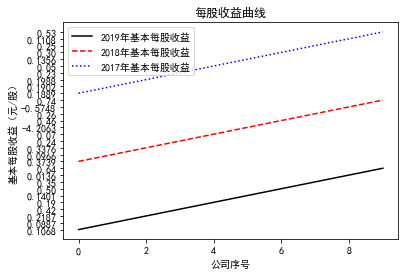

In [20]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.plot(gsxx['2019年基本每股收益（元/股）'],label='2019年基本每股收益',color='k')
plt.plot(gsxx['2018年基本每股收益（元/股）'],label='2018年基本每股收益',color='r',linestyle='dashed')
plt.plot(gsxx['2017年基本每股收益（元/股）'],label='2017年基本每股收益',color='b',linestyle=':')
plt.xlabel('公司序号')
plt.ylabel('基本每股收益（元/股）')
plt.title('每股收益曲线')
plt.legend(loc='best')
plt.show()

作图比较这十家公司在2017，2018，2019这三年的基本每股收益变化，由图可知这十家公司这三年的基本每股收益呈递增趋势.